###**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statistics as state
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from IPython.display import display

### **Importing Dataset**

In [2]:
data = pd.read_csv('/content/thyroid.csv')
data.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,Result
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


### **Exploratory Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   object 
 3   queryonthyroxine         3770 non-null   object 
 4   onantithyroidmedication  3770 non-null   object 
 5   sick                     3770 non-null   object 
 6   pregnant                 3770 non-null   object 
 7   thyroidsurgery           3770 non-null   object 
 8   I131treatment            3770 non-null   object 
 9   queryhypothyroid         3770 non-null   object 
 10  queryhyperthyroid        3770 non-null   object 
 11  lithium                  3770 non-null   object 
 12  goitre                   3770 non-null   object 
 13  tumor                    3770 non-null   object 
 14  hypopituitary           

In [4]:
# shape of the dataset
data.shape

(3770, 30)

In [5]:
# size of the dataset
data.size

113100

In [6]:
# Viewing the dataset Columns
data.describe()

,Age,TSH,T3,T4,T4U,FTI,TBG
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,0.0
mean,51.724934,4.591025,1.603008,101.678462,0.892921,99.176844,NaN
std,20.097915,23.345886,1.097207,43.192637,0.354295,45.851205,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.250000,NaN
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000,NaN
75%,67.000000,2.475000,2.200000,123.000000,1.070000,121.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [7]:
# Checking for the data types
data.dtypes

,0
Age,int64
sex,object
thyroxine,object
queryonthyroxine,object
onantithyroidmedication,object
sick,object
pregnant,object
thyroidsurgery,object
I131treatment,object
queryhypothyroid,object


In [8]:
data.columns

Index(['Age', 'sex', 'thyroxine', 'queryonthyroxine',
       'onantithyroidmedication', 'sick', 'pregnant', 'thyroidsurgery',
       'I131treatment', 'queryhypothyroid', 'queryhyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSHmeasured', 'TSH',
       'T3measured', 'T3', 'TT4measured', 'T4', 'T4Umeasured', 'T4U',
       'FTImeasured', 'FTI', 'TBGmeasured', 'TBG', 'referral source',
       'Result'],
      dtype='object')

In [9]:
# Create an empty list to store unique values
unique_values_list = []

# Iterate through each column in the dataset
for col in data.columns:
    # Get unique values for the current column
    unique_values = pd.unique(data[col])

    # Append the column name and its unique values to the list
    unique_values_list.append({'Column Name': col, 'Unique Values': unique_values})

# Create a DataFrame from the list of dictionaries
unique_values_df = pd.DataFrame(unique_values_list)

# Display the DataFrame
unique_values_df

,Column Name,Unique Values
0,Age,"[12, 20, 46, 70, 18, 59, 80, 66, 68, 84, 67, 7..."
1,sex,"[F, M, nan]"
2,thyroxine,"[f, t]"
3,queryonthyroxine,"[f, t]"
4,onantithyroidmedication,"[f, t]"
5,sick,"[f, t]"
6,pregnant,"[f, t]"
7,thyroidsurgery,"[f, t]"
8,I131treatment,"[f, t]"
9,queryhypothyroid,"[f, t]"


### **Imputation method for categorical columns**

In [10]:
most_frequent_sex = data['sex'].mode()[0]
data['sex'].fillna(most_frequent_sex, inplace=True)

<ipython-input-10-3990da54c4fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].fillna(most_frequent_sex, inplace=True)


In [11]:
data.isnull().sum()

,0
Age,0
sex,0
thyroxine,0
queryonthyroxine,0
onantithyroidmedication,0
sick,0
pregnant,0
thyroidsurgery,0
I131treatment,0
queryhypothyroid,0


In [12]:
# Let's drop some unnecessary columns
data=data.drop(['TSHmeasured','T3measured', 'TT4measured', 'T4Umeasured','FTImeasured','TBG','TBGmeasured'],axis=1)
#Dropping faulty data
data=data[data['Age']!=455]

In [13]:
data.shape

(3769, 23)

In [14]:
data = data.drop_duplicates()
data.shape

(3706, 23)

### **Correlation**

In [15]:
Num=data[['Age','TSH','T4','T3','T4U','FTI','Result']] #Select Numerical Features
Num['Result']=Num['Result'].map({'P':1,'N':0}) #Convert Categorical to Binary
Cat=data.select_dtypes(include=['object']).columns

<ipython-input-15-6606fd339494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Num['Result']=Num['Result'].map({'P':1,'N':0}) #Convert Categorical to Binary


The most significant attribute is 'TSH' with a correlation of -0.43.
The most significant attribute is 'TSH' with a correlation of -0.45.
The most significant attribute is 'TSH' with a correlation of -0.37.


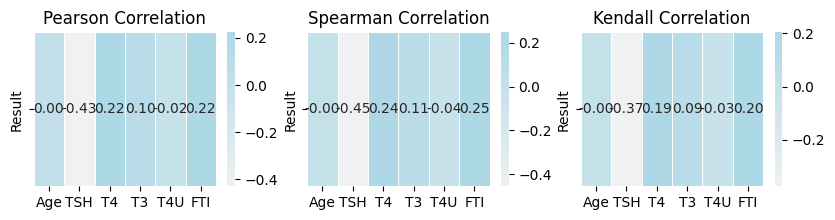

In [16]:
# Compute the Pearson correlation matrix
pearson_correlation_matrix = Num.corr(method='pearson')

# Identify the significance of attributes
correlation_with_target = pearson_correlation_matrix['Result'].drop('Result')

pearson = pearson_correlation_matrix.loc[['Result'], correlation_with_target.index]

most_significant_attribute = correlation_with_target.abs().idxmax()
most_significant_correlation = correlation_with_target[most_significant_attribute]

print(f"The most significant attribute is '{most_significant_attribute}' with a correlation of {most_significant_correlation:.2f}.")

# Compute the Spearman correlation matrix
spearman_correlation_matrix = Num.corr(method='spearman')

# Identify the significance of attributes

correlation_with_target = spearman_correlation_matrix['Result'].drop('Result')
spearman = spearman_correlation_matrix.loc[['Result'], correlation_with_target.index]
most_significant_attribute = correlation_with_target.abs().idxmax()
most_significant_correlation = correlation_with_target[most_significant_attribute]

print(f"The most significant attribute is '{most_significant_attribute}' with a correlation of {most_significant_correlation:.2f}.")

# Compute the Kendall correlation matrix
kendall_correlation_matrix = Num.corr(method='kendall')

# Identify the most significant attribute
correlation_with_target = kendall_correlation_matrix['Result'].drop('Result')
kendall = kendall_correlation_matrix.loc[['Result'], correlation_with_target.index]
most_significant_attribute = correlation_with_target.abs().idxmax()
most_significant_correlation = correlation_with_target[most_significant_attribute]

print(f"The most significant attribute is '{most_significant_attribute}' with a correlation of {most_significant_correlation:.2f}.")

# Plot the heatmap
plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
sns.heatmap(pearson, annot=True, cmap=sns.light_palette("lightblue", as_cmap=True), fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation')

plt.subplot(1,3,2)
sns.heatmap(spearman, annot=True, cmap=sns.light_palette("lightblue", as_cmap=True), fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation')


plt.subplot(1,3,3)
sns.heatmap(kendall, annot=True, cmap=sns.light_palette("lightblue", as_cmap=True), fmt='.2f', linewidths=0.5)
plt.title('Kendall Correlation')
plt.show()


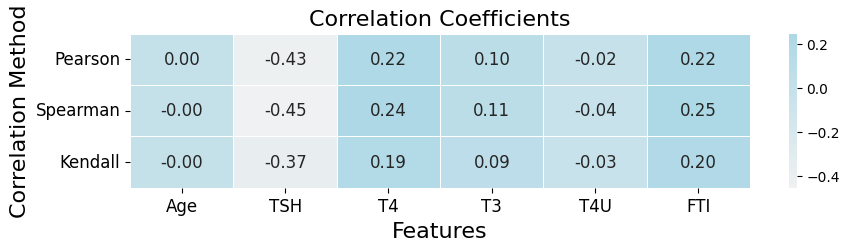

In [21]:
# Assuming you have already computed the correlation matrices
# Create a DataFrame to hold the correlation values
correlation_data = {
    'Feature': correlation_with_target.index,
    'Pearson': pearson.iloc[0].values,
    'Spearman': spearman.iloc[0].values,
    'Kendall': kendall.iloc[0].values
}

# Convert the data into a DataFrame
correlation_df = pd.DataFrame(correlation_data)

# Set the Feature column as the index
correlation_df.set_index('Feature', inplace=True)
correlation_df = correlation_df.T
# Plotting
plt.figure(figsize=(10, 2))
sns.heatmap(correlation_df, annot=True, cmap=sns.light_palette("lightblue", as_cmap=True),fmt='.2f', linewidths=0.5,annot_kws={"size": 12})
plt.title('Correlation Coefficients',fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.ylabel('Correlation Method',fontsize=16)

# Adjust font size for both x-axis (features) and y-axis (methods)
plt.tick_params(axis='y', labelsize=12)  # Set y-axis (methods) label size
plt.tick_params(axis='x', labelsize=12)  # Set x-axis (features) label size

plt.show()

**Logistic Regression**

In [ ]:
LR=data[['Age','TSH','T3','T4U','FTI','Result']] #Select Numerical Features
LR['Result']=LR['Result'].map({'P':1,'N':0}) #Convert Categorical to Binary

I=LR.drop(['Result'],axis=1) #Independent features
D=LR[['Result']]   #Dependent class variable

# Add a constant term to the independent features
I = sm.add_constant(I)
# Fit the logistic regression model
logit_model = sm.Logit(D, I)
result = logit_model.fit()
summary_table = pd.DataFrame({
    'Coefficients': result.params,
    'Standard Errors': result.bse,
    'Z-scores': result.tvalues,
    'P-values': result.pvalues,
    'LL-Null': result.llnull,
    'Covariance Type': result.cov_type,
    'LLR p-value': result.llr_pvalue,
    'Converged': result.mle_retvals['converged']
})

print(summary_table)
# print(f'Coefficients    Standard Errors    Z-scores     P-values   Convergence Status    Log-Likelihood (Null)    (LLR) p-value')
# print(f'{result.bse}    {result.tvalues}    {result.pvalues}    {result.mle_retvals['converged']}    {result.llnull}    {result.llnull}    {result.llr_pvalue}')


Optimization terminated successfully.
         Current function value: 0.150662
         Iterations 9
       Coefficients  Standard Errors   Z-scores      P-values      LL-Null  \
const      3.151325         0.349985   9.004174  2.172962e-19 -1016.886122   
Age       -0.005140         0.004504  -1.140988  2.538750e-01 -1016.886122   
TSH       -0.251378         0.016107 -15.607180  6.504941e-55 -1016.886122   
T3         0.213650         0.087579   2.439515  1.470698e-02 -1016.886122   
T4U       -0.916353         0.310275  -2.953359  3.143360e-03 -1016.886122   
FTI        0.015488         0.003028   5.114571  3.144548e-07 -1016.886122   

      Covariance Type    LLR p-value  Converged  
const       nonrobust  3.268854e-198       True  
Age         nonrobust  3.268854e-198       True  
TSH         nonrobust  3.268854e-198       True  
T3          nonrobust  3.268854e-198       True  
T4U         nonrobust  3.268854e-198       True  
FTI         nonrobust  3.268854e-198       True  


<ipython-input-112-0c3c8f046b63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LR['Result']=LR['Result'].map({'P':1,'N':0}) #Convert Categorical to Binary


**Chi Square**

Contingency Table of sex:
Result    N     P
sex              
F       215  2261
M        65  1078

Expected Frequencies of sex:
[[ 191.56673114 2284.43326886]
 [  88.43326886 1054.56673114]]


Contingency Table of thyroxine:
Result       N     P
thyroxine           
f          282  3024
t            9   454

Expected Frequencies of thyroxine:
[[ 255.25232157 3050.74767843]
 [  35.74767843  427.25232157]]


Contingency Table of queryonthyroxine:
Result              N     P
queryonthyroxine           
f                 288  3431
t                   3    47

Expected Frequencies of queryonthyroxine:
[[ 287.13955956 3431.86044044]
 [   3.86044044   46.13955956]]


Contingency Table of onantithyroidmedication:
Result                     N     P
onantithyroidmedication           
f                        290  3436
t                          1    42

Expected Frequencies of onantithyroidmedication:
[[2.87680021e+02 3.43831998e+03]
 [3.31997877e+00 3.96800212e+01]]


Contingency Table of sick:

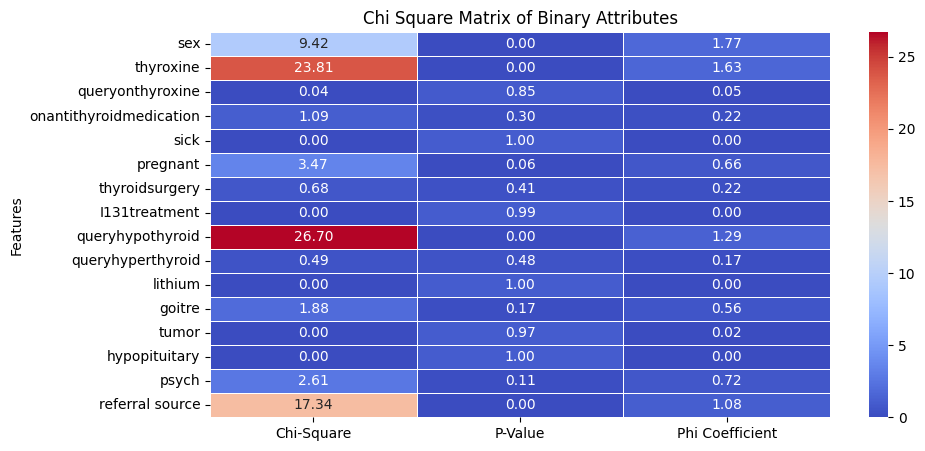

In [ ]:
Chi=data[Cat] #Select Categorical Features

I=Chi.drop(['Result'],axis=1) #Independent features

# Initialize lists to store results
features = []
chi2_stats = []
p_values = []
dofs = []
phi_values=[]
# Create a contingency table
for i in I.columns:
    contingency_table = pd.crosstab(I[i],Chi['Result'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    phi=np.sqrt(chi2 / len(i))
    #Store values and columns

    features.append(i)
    chi2_stats.append(chi2)
    p_values.append(p)
    dofs.append(dof)
    phi_values.append(phi)

# Create summary DataFrame
summary_table = pd.DataFrame({
    "Features": features,
    "Chi-Square": chi2_stats,
    "P-Value": p_values,
    "Phi Coefficient": phi_values,
    "Degrees of Freedom": dofs
})

# Preparefor heatmap
heatmap_data = summary_table.set_index('Features')[['Chi-Square', 'P-Value', 'Phi Coefficient']]

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Chi Square Matrix of Binary Attributes')
plt.show()

In [ ]:
data.shape

(3769, 23)

### **DATA DISTRIBUTION**

In [ ]:
def dist(x):
  mean=x.mean()
  median=x.median()
  mode=state.mode(x)
  print("  mean: ",mean)
  print("  median: ",median)
  print("  mode: ",mode)

In [ ]:
def displot(x,i):
  mean=x.mean()
  median=x.median()
  mode=state.mode(x)
  plt.subplots(figsize=(10,5))
  plt.hist(x,edgecolor='black',color='lightsteelblue')
  plt.axvline(mean,color='red',lw=2,label=f'Mean of {i}:{mean}')
  plt.axvline(median,color='pink',lw=2,label=f'Median of {i}:{median}')
  plt.axvline(mode,color='purple',lw=2,label=f'Mode of {i}:{mode}')
  plt.xlabel(i)
  plt.ylabel('Count')
  if (abs(mean-median))<0.5:
    plt.title(f'{i} (Normal Distribution)')
  elif mean>median>mode:
    plt.title(f'{i} (Positive Skew)')
  else:
    plt.title(f'{i} (Negative Skew)')
  plt.legend()

In [ ]:
col = data.select_dtypes(include=['int','float']).columns
for i in col:
  print(i)
  dist(data[i])

Age
  mean:  51.617935791987264
  median:  54.0
  mode:  59
TSH
  mean:  4.591951446006898
  median:  1.2
  mode:  0.0
T3
  mean:  1.6029026266914301
  median:  1.8
  mode:  0.0
T4
  mean:  101.67413106924916
  median:  102.0
  mode:  0.0
T4U
  mean:  0.892858583178562
  median:  0.95
  mode:  0.0
FTI
  mean:  99.17556381002919
  median:  104.0
  mode:  0.0


**Numerical Data Histogram**

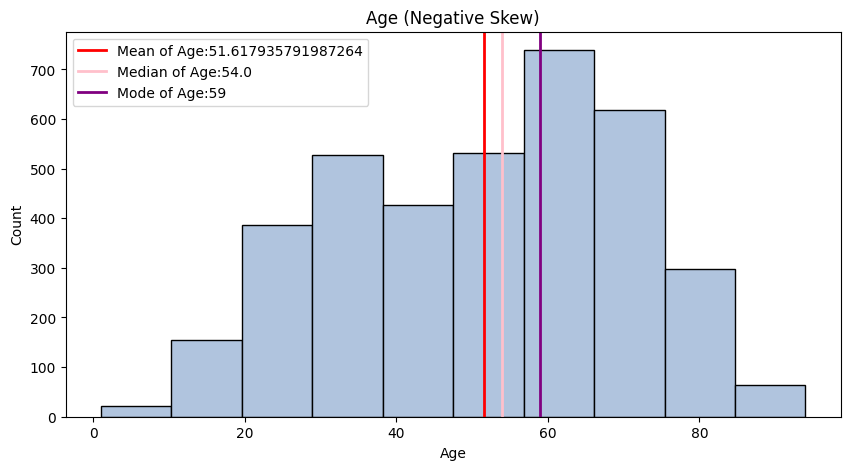

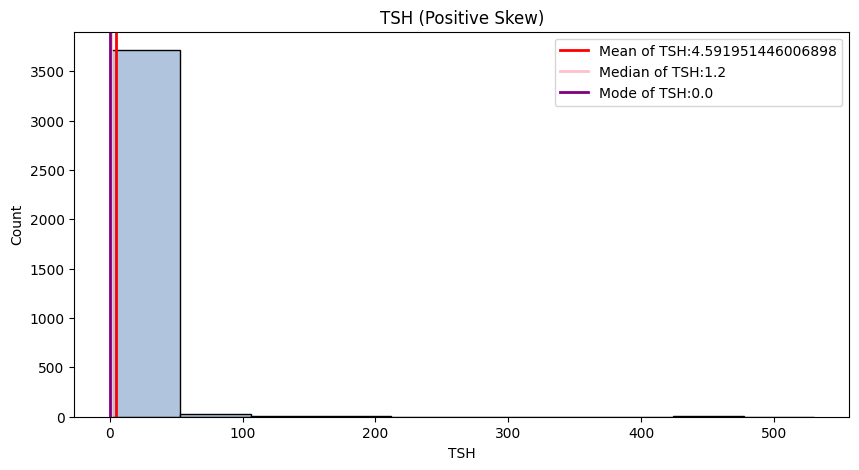

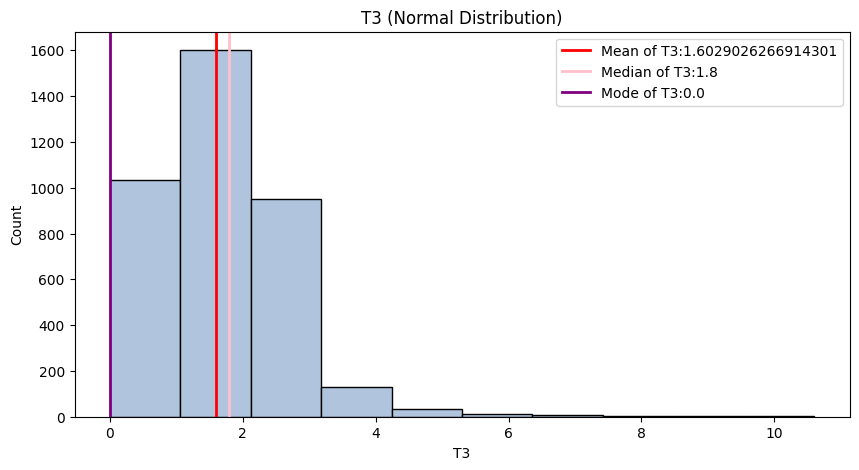

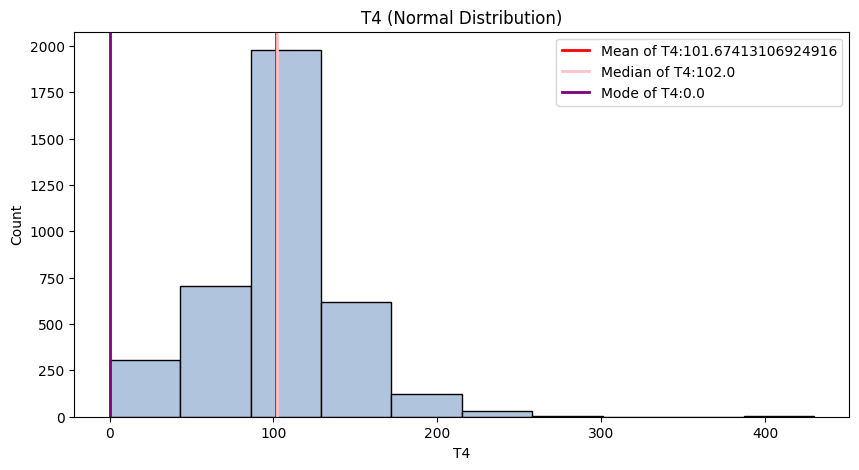

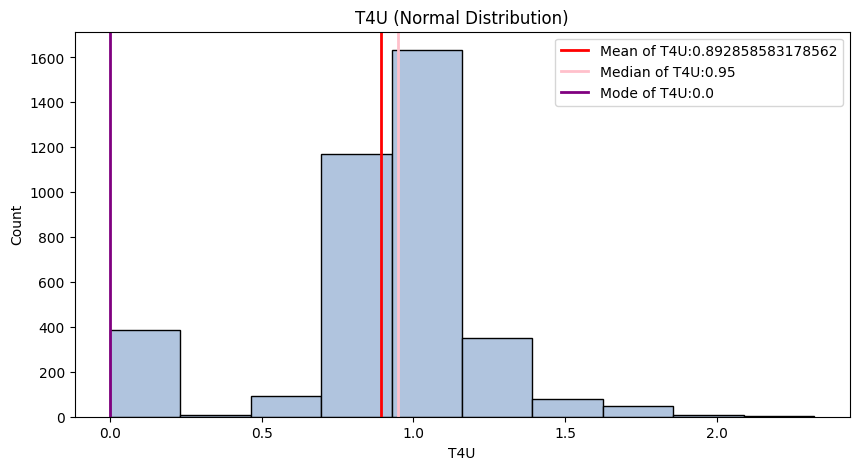

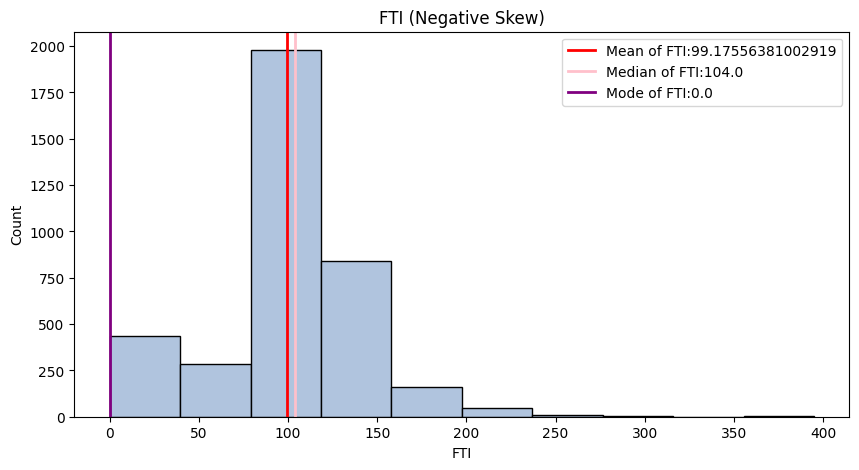

In [ ]:
for i in col:
  displot(data[i],i)

In [ ]:
def mode(x):
  mode=state.mode(x)
  print(mode)

In [ ]:
def barplot(x,i):
    count=x.value_counts()
    colors=['steelblue','skyblue','teal']
    plt.subplots(figsize=(10,5))
    plt.bar(count.index,count,width=0.5,color=colors)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Barplot for {i}')
    plt.show()

In [ ]:
cols=data.select_dtypes(include=['object']).columns
for i in cols:
  print("Mode of :",i)
  mode(data[i])

Mode of : sex
F
Mode of : thyroxine
f
Mode of : queryonthyroxine
f
Mode of : onantithyroidmedication
f
Mode of : sick
f
Mode of : pregnant
f
Mode of : thyroidsurgery
f
Mode of : I131treatment
f
Mode of : queryhypothyroid
f
Mode of : queryhyperthyroid
f
Mode of : lithium
f
Mode of : goitre
f
Mode of : tumor
f
Mode of : hypopituitary
f
Mode of : psych
f
Mode of : referral source
other
Mode of : Result
P


**Categorical Data Barplot**

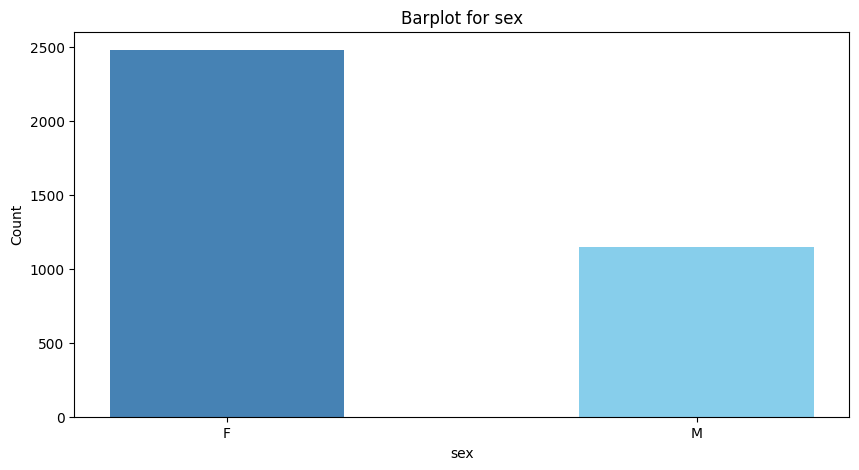

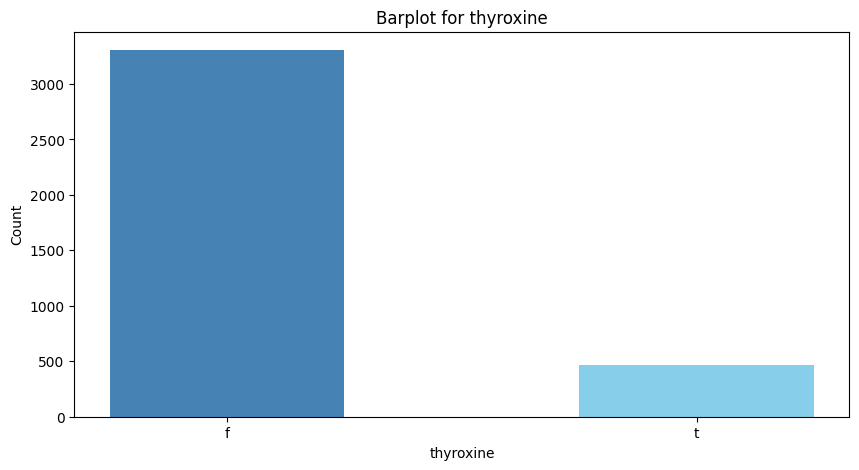

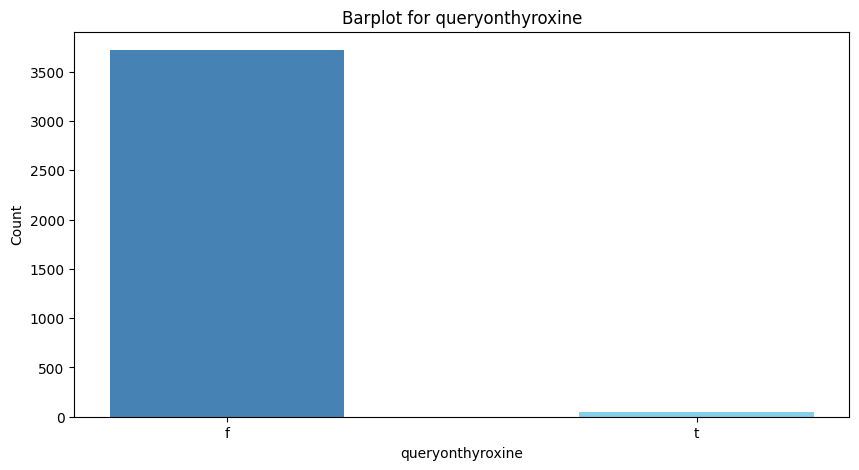

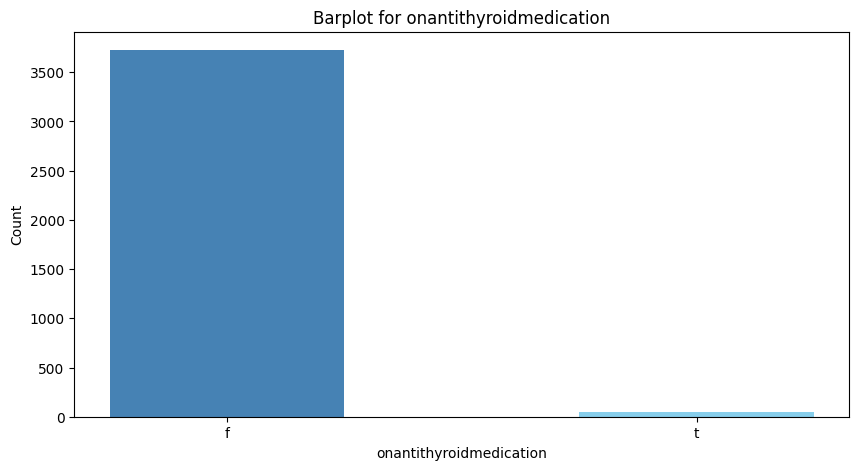

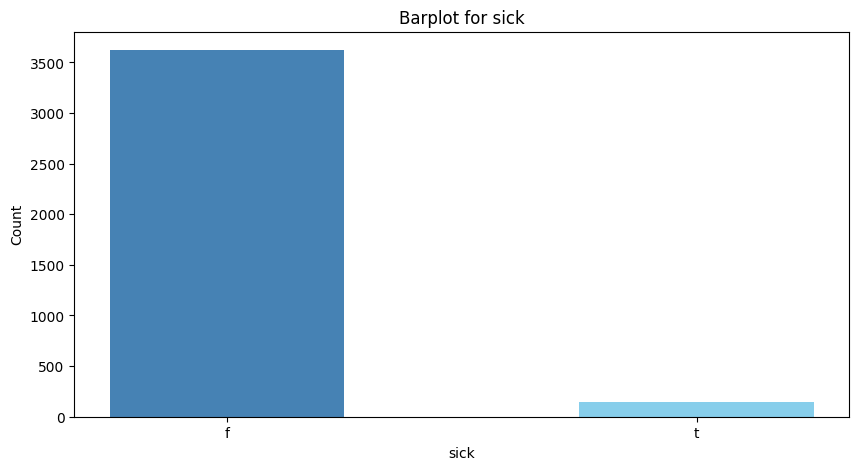

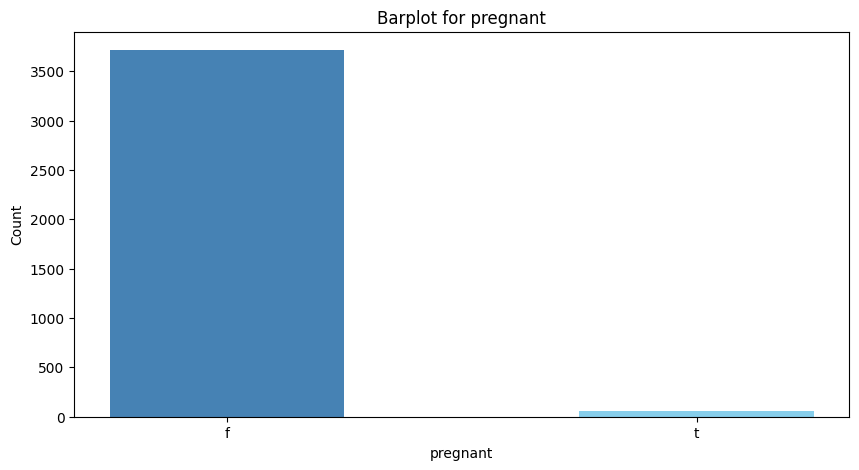

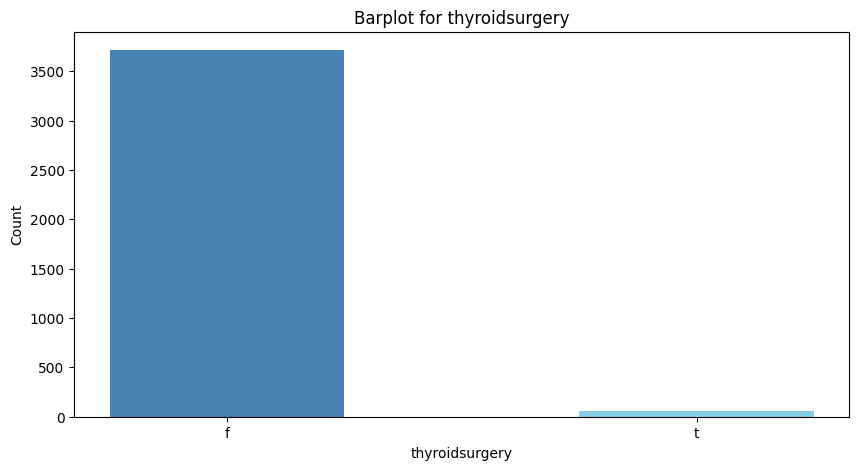

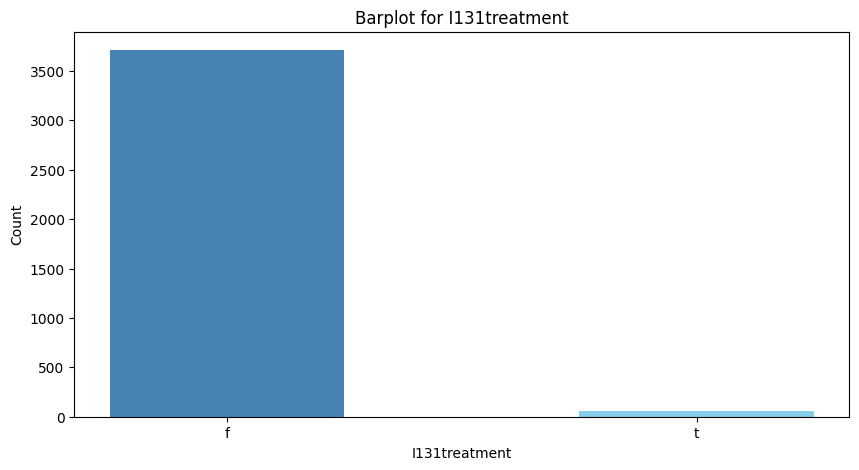

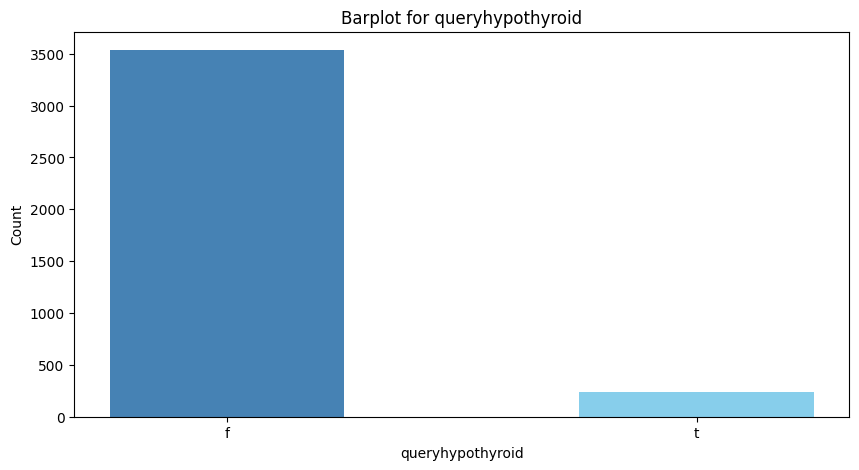

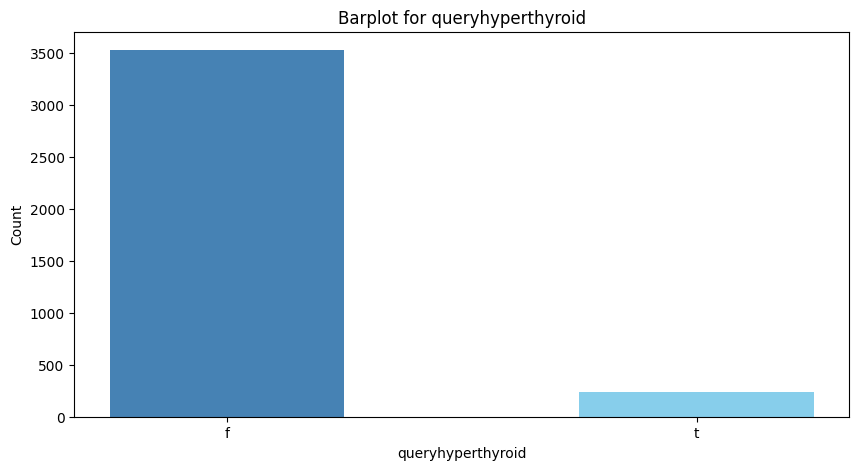

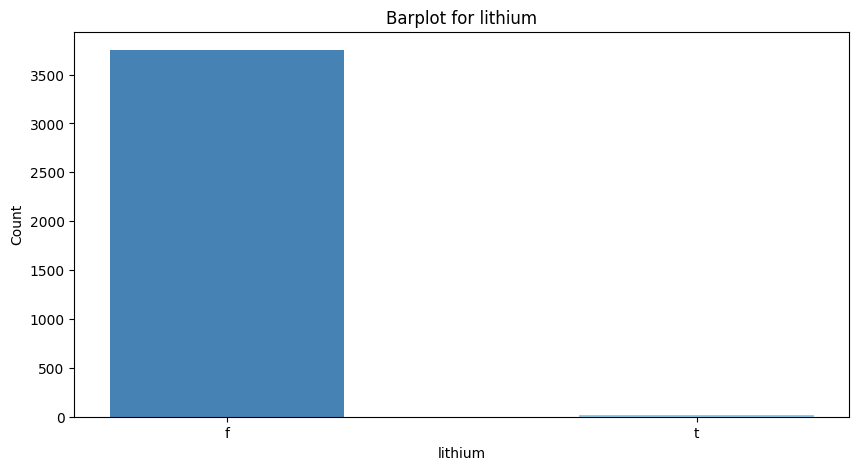

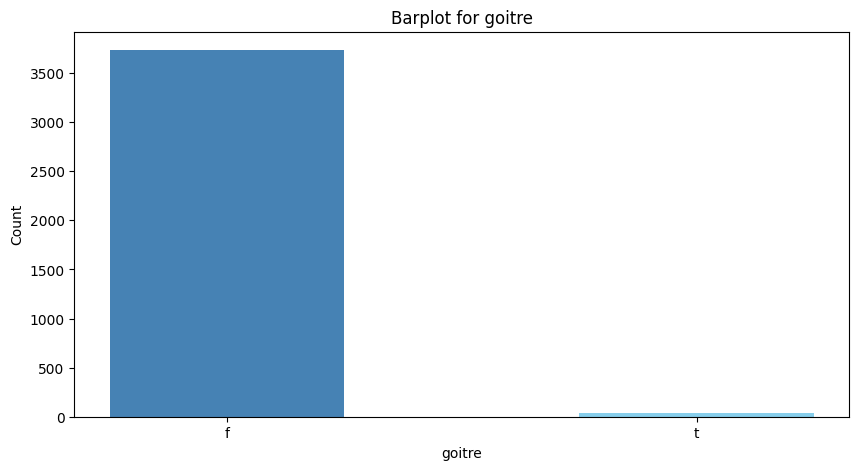

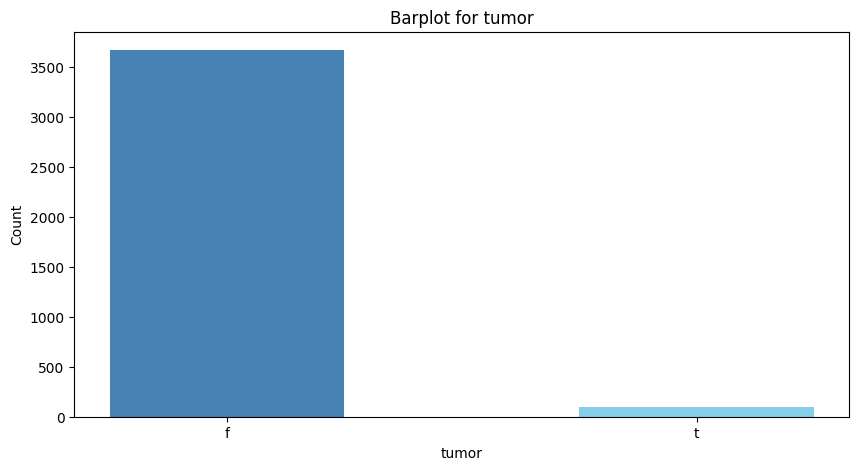

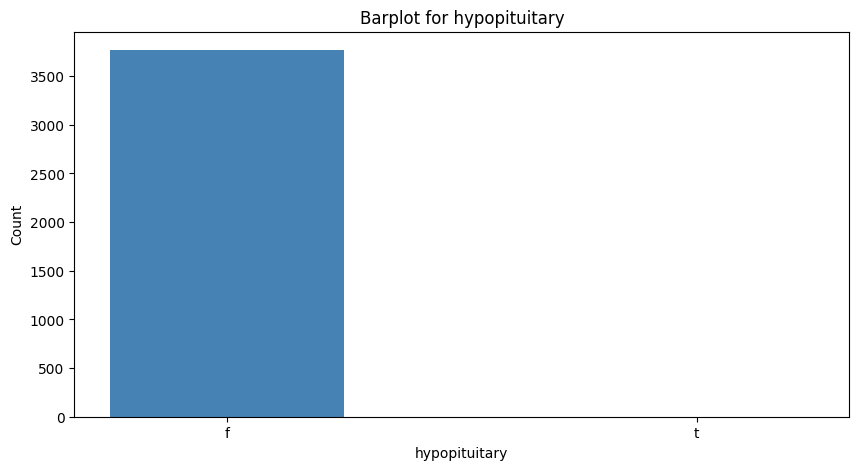

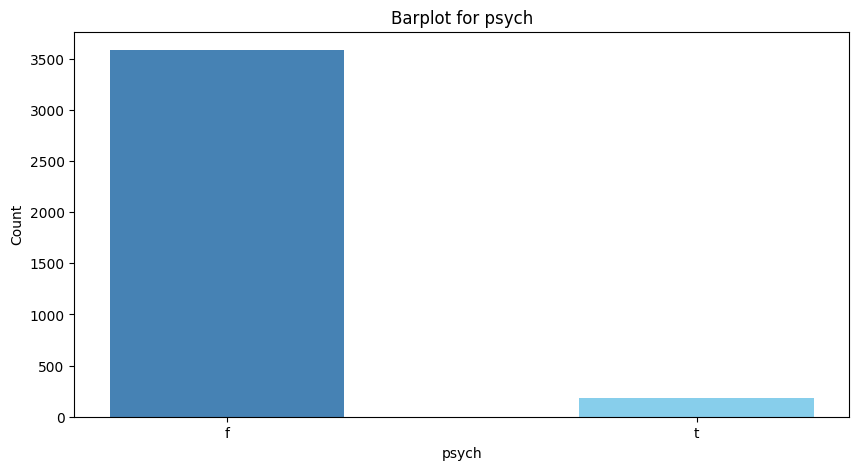

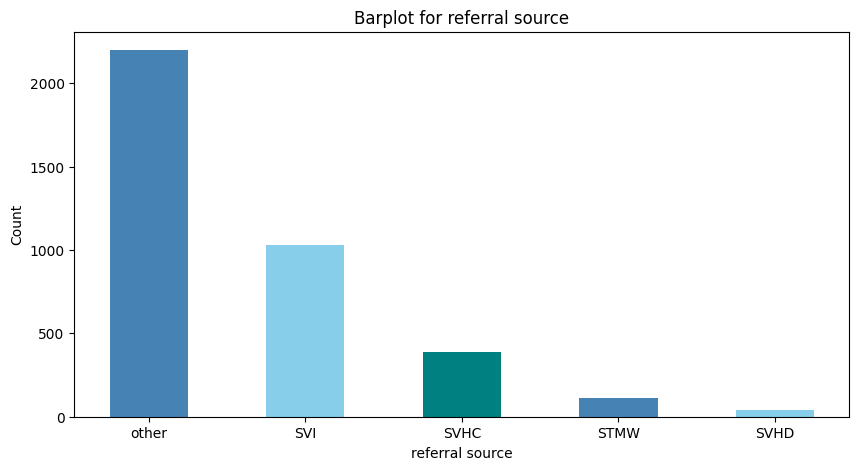

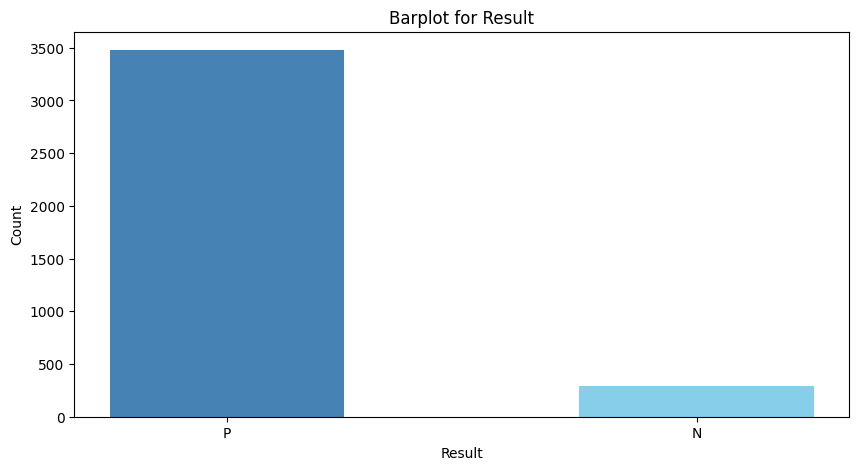

In [ ]:
for i in cols:
  barplot(data[i],i)

**Scatter Plot**

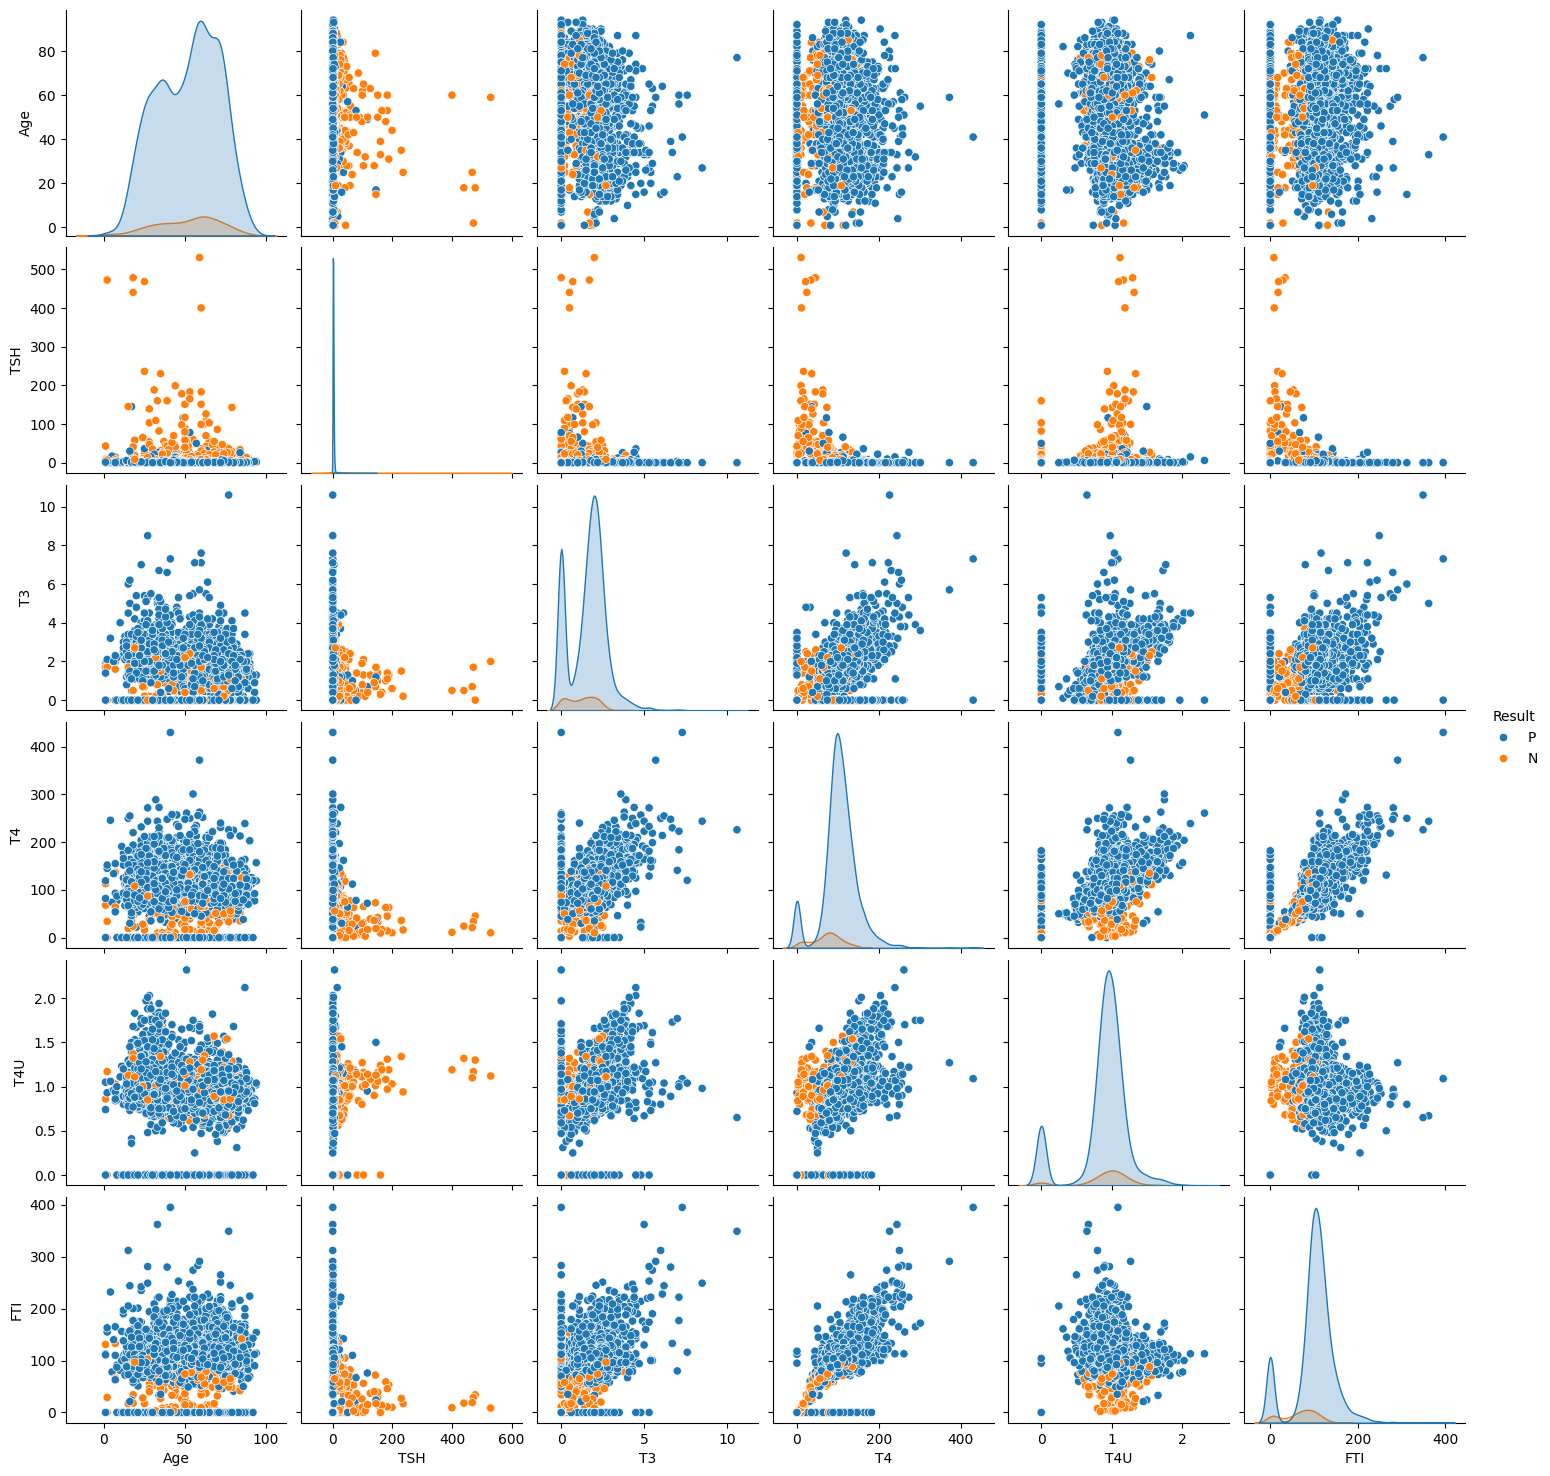

In [ ]:
sns.pairplot(data,hue='Result')

In [ ]:
# Display distribution for each column
for column in data.columns:
    print("\nColumn:", column)
    print(data[column].value_counts())


Column: Age
Age
59    95
60    91
70    90
55    81
73    81
      ..
92     2
10     1
4      1
5      1
6      1
Name: count, Length: 92, dtype: int64

Column: sex
sex
F    2476
M    1143
Name: count, dtype: int64

Column: thyroxine
thyroxine
f    3306
t     463
Name: count, dtype: int64

Column: queryonthyroxine
queryonthyroxine
f    3719
t      50
Name: count, dtype: int64

Column: onantithyroidmedication
onantithyroidmedication
f    3726
t      43
Name: count, dtype: int64

Column: sick
sick
f    3622
t     147
Name: count, dtype: int64

Column: pregnant
pregnant
f    3716
t      53
Name: count, dtype: int64

Column: thyroidsurgery
thyroidsurgery
f    3716
t      53
Name: count, dtype: int64

Column: I131treatment
I131treatment
f    3711
t      58
Name: count, dtype: int64

Column: queryhypothyroid
queryhypothyroid
f    3535
t     234
Name: count, dtype: int64

Column: queryhyperthyroid
queryhyperthyroid
f    3532
t     237
Name: count, dtype: int64

Column: lithium
lithium
f    

**Variance**

In [ ]:
# Calculate variance for each column
variances = data[data.select_dtypes(include=['int','float']).columns].var()

# Print out the variance for each column
print("Variance of each column:")
print(variances)

Variance of each column:
Age     360.860888
TSH     545.171812
T3        1.204140
T4     1866.028277
T4U       0.125543
FTI    2102.884772
dtype: float64


### **Check Missing Values**

In [ ]:
data.isnull().sum()

Age                          0
sex                        150
thyroxine                    0
queryonthyroxine             0
onantithyroidmedication      0
sick                         0
pregnant                     0
thyroidsurgery               0
I131treatment                0
queryhypothyroid             0
queryhyperthyroid            0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
T4                           0
T4U                          0
FTI                          0
referral source              0
Result                       0
dtype: int64

<Axes: >

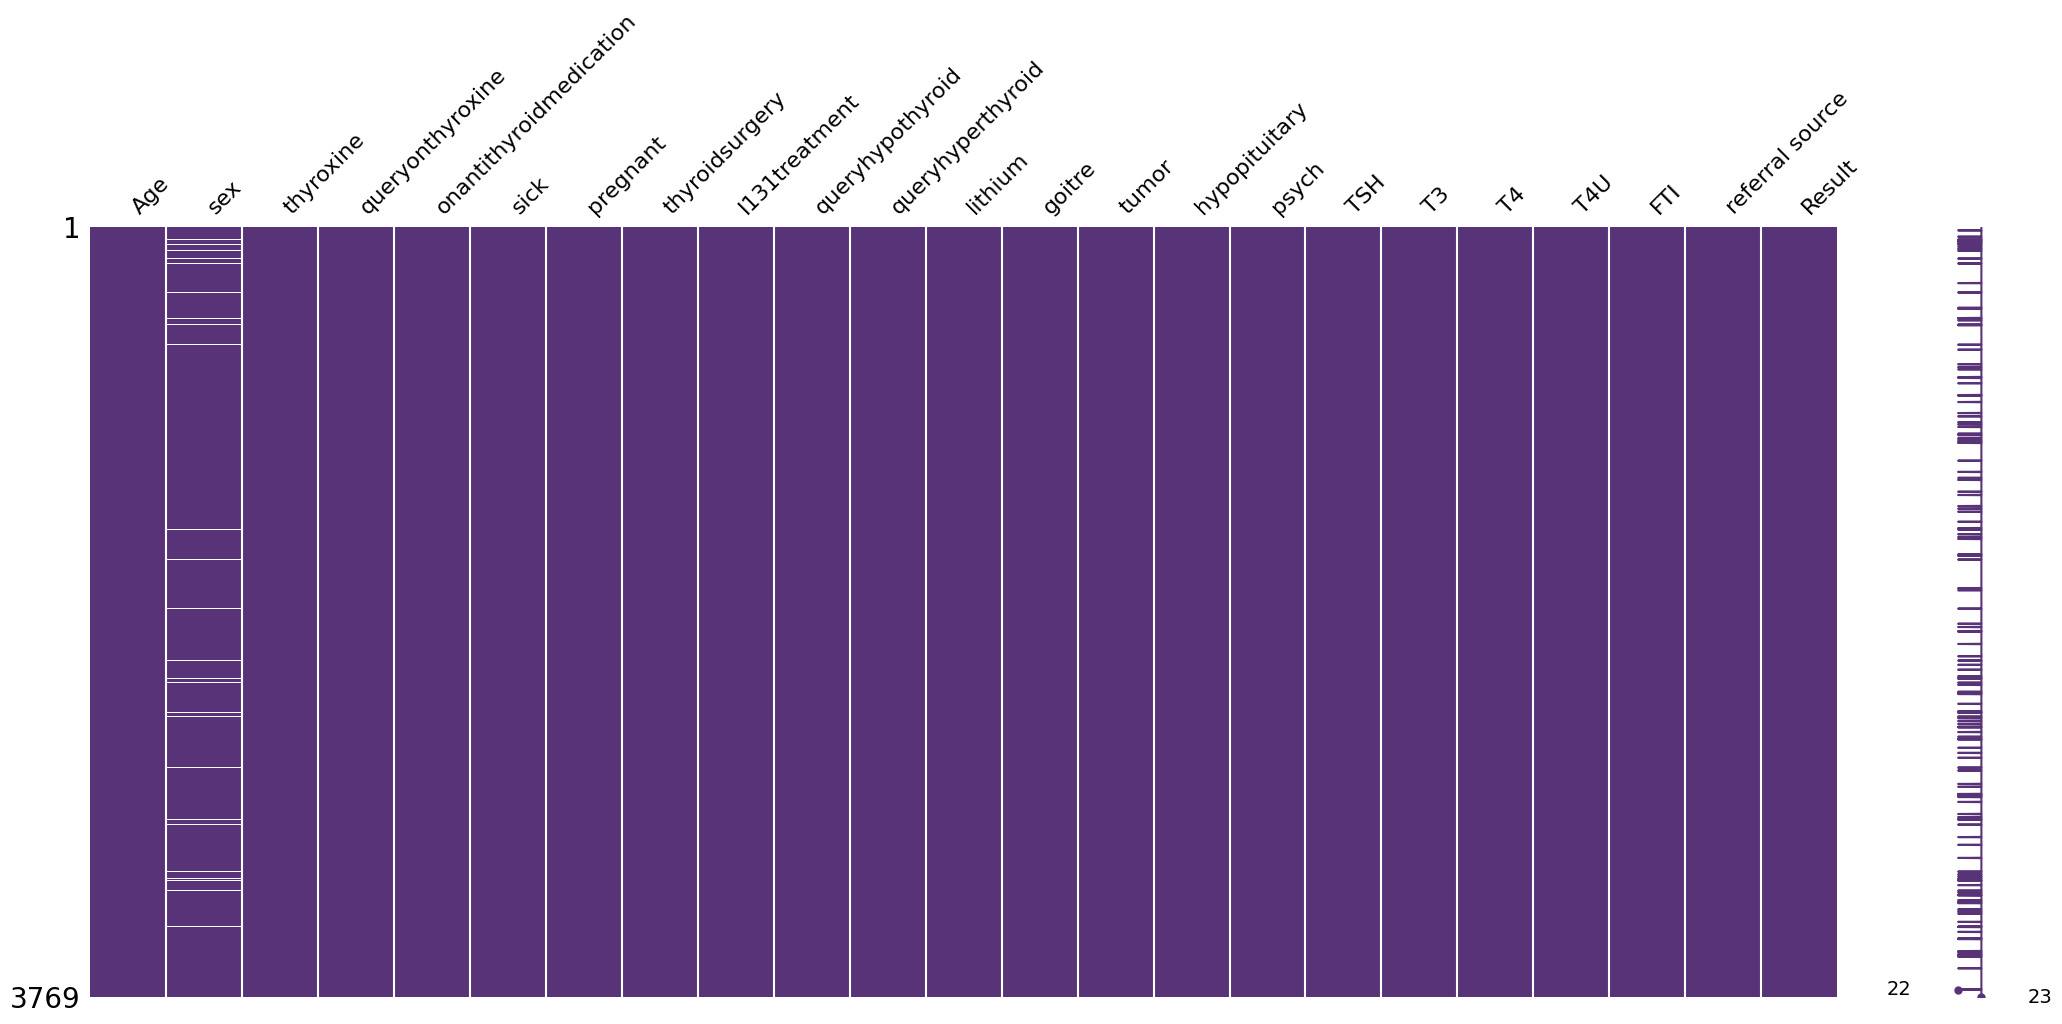

In [ ]:
msno.matrix(data,color=(0.35, 0.2, 0.47))

### **Imputation method for categorical columns**

In [ ]:
most_frequent_sex = data['sex'].mode()[0]
data['sex'].fillna(most_frequent_sex, inplace=True)

In [ ]:
data.isnull().sum()

Age                        0
sex                        0
thyroxine                  0
queryonthyroxine           0
onantithyroidmedication    0
sick                       0
pregnant                   0
thyroidsurgery             0
I131treatment              0
queryhypothyroid           0
queryhyperthyroid          0
lithium                    0
goitre                     0
tumor                      0
hypopituitary              0
psych                      0
TSH                        0
T3                         0
T4                         0
T4U                        0
FTI                        0
referral source            0
Result                     0
dtype: int64

<Axes: >

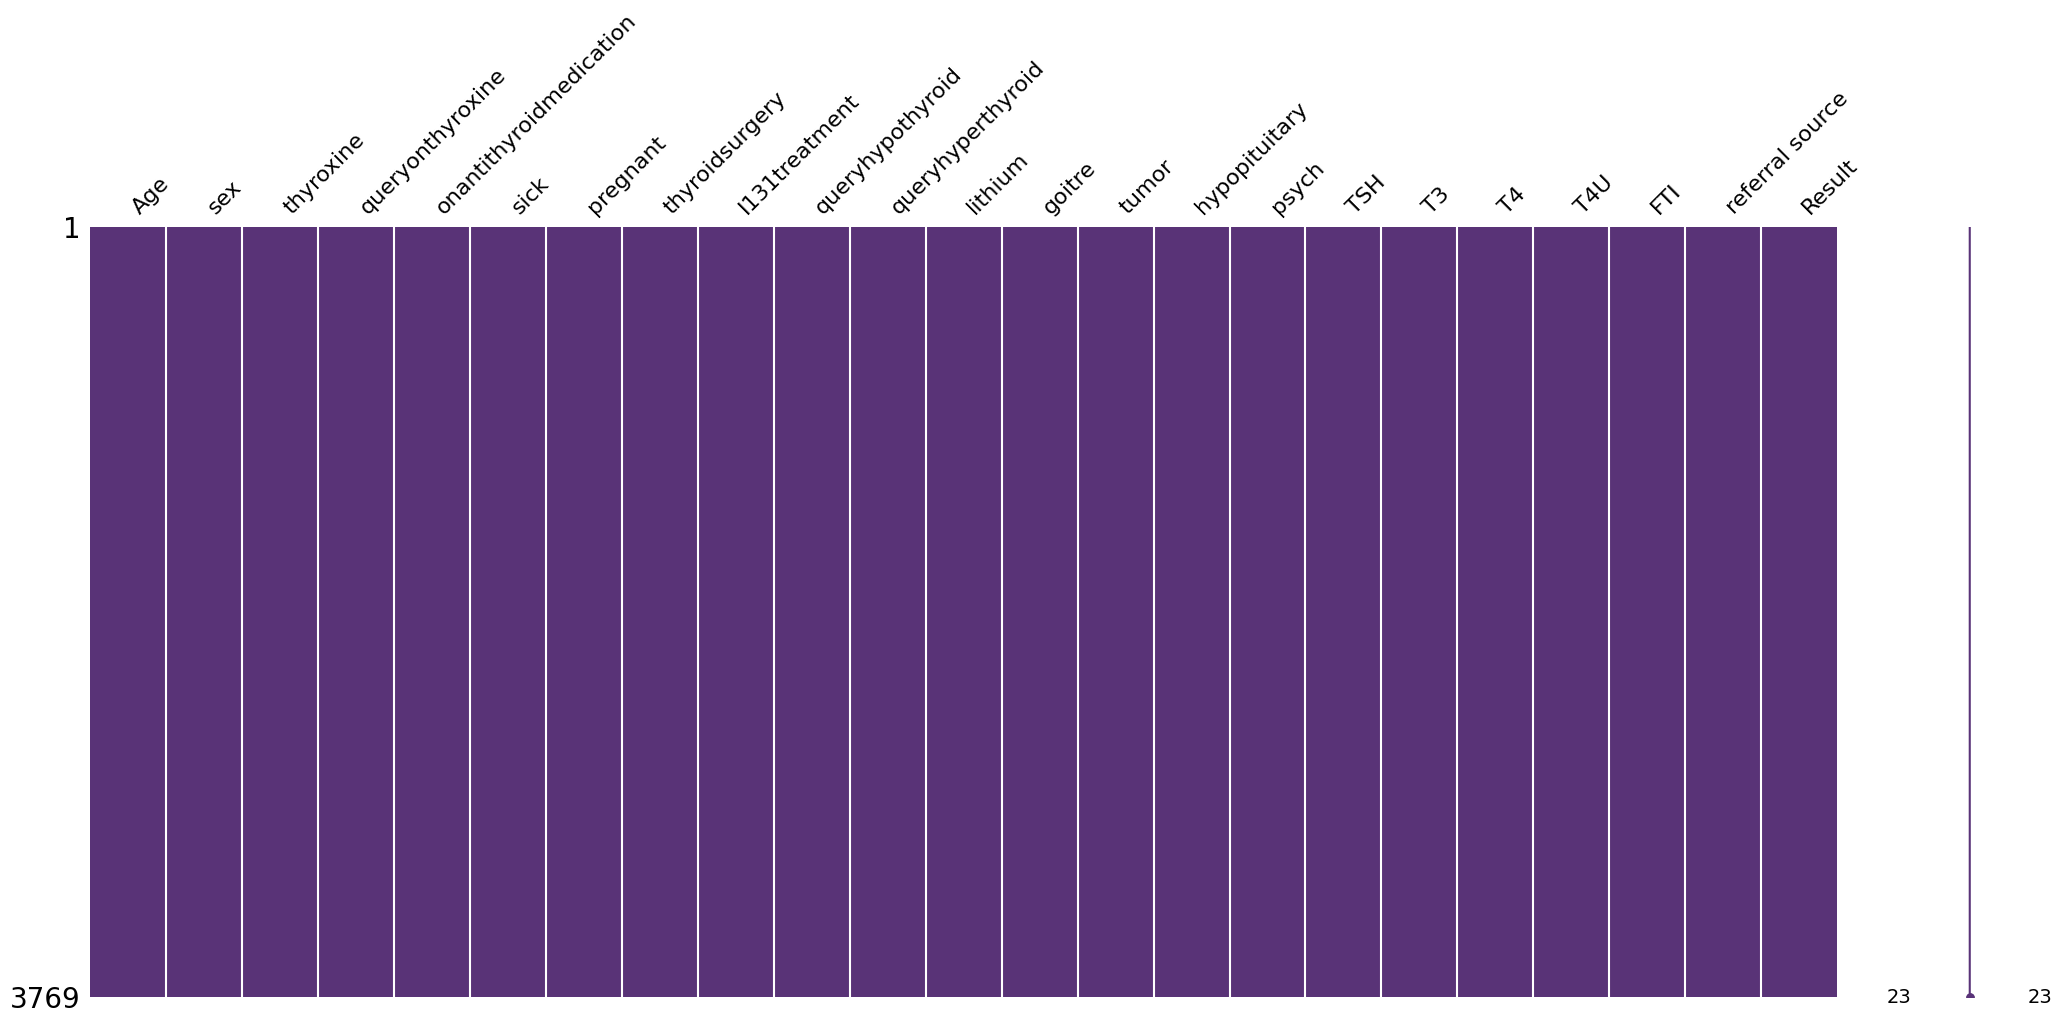

In [ ]:
msno.matrix(data,color=(0.35, 0.2, 0.47))

### **Duplicates**

In [ ]:
# dropping duplicates
data.duplicated().sum()

63

In [ ]:
data = data.drop_duplicates(keep=False)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(3672, 23)

### **Outlier Detection**

In [ ]:
# Calculate Z-scores for normally distributed columns
normal_cols = ['T3','T4','T4U']
z_scores = (data[normal_cols] - data[normal_cols].mean()) / data[normal_cols].std()

# Set threshold for identifying outliers
threshold = 3

# Identify outliers
z_outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print rows containing outliers
data[z_outliers.any(axis=1)]

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
25,63,F,f,f,f,f,f,f,f,f,...,f,f,f,0.030,5.5,199.0,1.05,190.0,other,P
69,45,F,t,f,f,f,f,f,f,f,...,f,f,f,9.000,2.8,237.0,1.17,203.0,STMW,P
151,55,F,f,f,f,f,f,f,f,f,...,f,f,f,0.010,5.5,219.0,0.80,274.0,other,P
249,25,F,f,f,f,f,f,f,f,f,...,f,f,f,1.600,5.4,152.0,1.50,102.0,STMW,P
300,28,F,f,f,f,f,f,f,f,f,...,f,f,f,0.800,3.8,193.0,1.93,100.0,STMW,P
338,45,F,f,f,f,f,f,f,f,f,...,f,f,f,0.080,4.8,257.0,1.20,214.0,other,P
441,33,F,f,f,f,f,f,f,f,f,...,f,f,f,0.160,5.2,183.0,0.83,220.0,other,P
456,33,F,f,f,f,f,f,f,f,f,...,f,f,f,0.015,5.0,244.0,0.67,362.0,other,P
530,26,F,f,f,f,f,t,f,f,f,...,f,f,f,0.300,0.0,151.0,1.97,76.0,other,P
542,15,F,f,f,f,f,f,f,f,f,...,f,f,f,0.015,6.0,250.0,0.80,312.0,other,P


In [ ]:
# Calculate Modified Z-scores for skew distributed columns
k=0.6745
threshold=3.5
skew_cols =['Age','TSH','FTI']
#deviation from median and MAD
deviation_from_med = np.array(data[skew_cols]) - np.median(data[skew_cols])
mad = np.median(np.abs(deviation_from_med))

#calculate modified z scores
mod_zscores = (k*deviation_from_med)/mad

#detect outliers
mod_outliers =(mod_zscores > threshold) | (mod_zscores < -threshold)
data[mod_outliers.any(axis=1)]

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
456,33,F,f,f,f,f,f,f,f,f,...,f,f,f,0.015,5.0,244.0,0.67,362.0,other,P
542,15,F,f,f,f,f,f,f,f,f,...,f,f,f,0.015,6.0,250.0,0.80,312.0,other,P
743,41,F,f,f,f,f,f,f,f,f,...,f,f,f,0.150,7.3,430.0,1.09,395.0,STMW,P
1165,18,F,t,f,f,f,f,f,f,f,...,f,f,f,478.000,0.0,45.0,1.30,34.0,other,N
1415,41,F,f,f,f,f,t,f,f,f,...,f,f,f,0.200,0.0,430.0,1.09,395.0,STMW,P
1671,77,M,f,f,f,f,f,f,f,f,...,f,f,f,0.015,10.6,226.0,0.65,349.0,other,P
2505,2,F,f,f,f,f,f,f,f,f,...,f,f,f,472.000,1.7,34.0,1.17,29.0,STMW,N
2770,25,F,f,f,f,f,f,f,f,f,...,f,f,f,468.000,0.7,21.0,1.10,19.0,other,N
3256,59,F,t,f,f,f,f,f,f,f,...,f,f,f,0.025,5.7,372.0,1.27,291.0,SVHD,P
3425,18,F,f,f,f,f,f,f,f,f,...,f,f,f,440.000,0.5,24.0,1.32,18.0,other,N


In [ ]:
# Combine outliers
combined_outliers = z_outliers & mod_outliers

# Filter data to get rows that have outliers in any of the columns
data[combined_outliers.any(axis=1)]

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result


In [ ]:
# Combine outliers
combined_outliers = z_outliers| mod_outliers

# Filter data to get rows that have outliers in any of the columns
data[combined_outliers.any(axis=1)]

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
25,63,F,f,f,f,f,f,f,f,f,...,f,f,f,0.03,5.5,199.0,1.05,190.0,other,P
69,45,F,t,f,f,f,f,f,f,f,...,f,f,f,9.00,2.8,237.0,1.17,203.0,STMW,P
151,55,F,f,f,f,f,f,f,f,f,...,f,f,f,0.01,5.5,219.0,0.80,274.0,other,P
249,25,F,f,f,f,f,f,f,f,f,...,f,f,f,1.60,5.4,152.0,1.50,102.0,STMW,P
300,28,F,f,f,f,f,f,f,f,f,...,f,f,f,0.80,3.8,193.0,1.93,100.0,STMW,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,56,F,f,f,f,f,f,f,f,f,...,f,f,f,0.02,7.1,223.0,1.00,222.0,other,P
3637,60,F,t,f,f,f,f,f,f,f,...,f,f,f,400.00,0.5,11.0,1.19,9.1,other,N
3688,27,F,f,t,f,f,t,f,f,f,...,f,f,f,2.20,4.1,157.0,2.01,78.0,other,P
3721,34,F,f,f,f,f,f,f,f,f,...,f,f,f,0.00,5.3,181.0,1.04,174.0,other,P


,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
25,63,F,f,f,f,f,f,f,f,f,...,f,f,f,0.03,5.5,199.0,1.05,190.0,other,P
69,45,F,t,f,f,f,f,f,f,f,...,f,f,f,9.00,2.8,237.0,1.17,203.0,STMW,P
151,55,F,f,f,f,f,f,f,f,f,...,f,f,f,0.01,5.5,219.0,0.80,274.0,other,P
249,25,F,f,f,f,f,f,f,f,f,...,f,f,f,1.60,5.4,152.0,1.50,102.0,STMW,P
300,28,F,f,f,f,f,f,f,f,f,...,f,f,f,0.80,3.8,193.0,1.93,100.0,STMW,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,56,F,f,f,f,f,f,f,f,f,...,f,f,f,0.02,7.1,223.0,1.00,222.0,other,P
3637,60,F,t,f,f,f,f,f,f,f,...,f,f,f,400.00,0.5,11.0,1.19,9.1,other,N
3688,27,F,f,t,f,f,t,f,f,f,...,f,f,f,2.20,4.1,157.0,2.01,78.0,other,P
3721,34,F,f,f,f,f,f,f,f,f,...,f,f,f,0.00,5.3,181.0,1.04,174.0,other,P


### **Summary of Dataset**

**Text Summary**

In [ ]:
print("Dataset Summary:")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Dataset Summary:
Number of rows: 3672
Number of columns: 23


In [ ]:
print("Columns and their data types:")
print(data.dtypes)

Columns and their data types:
Age                          int64
sex                         object
thyroxine                   object
queryonthyroxine            object
onantithyroidmedication     object
sick                        object
pregnant                    object
thyroidsurgery              object
I131treatment               object
queryhypothyroid            object
queryhyperthyroid           object
lithium                     object
goitre                      object
tumor                       object
hypopituitary               object
psych                       object
TSH                        float64
T3                         float64
T4                         float64
T4U                        float64
FTI                        float64
referral source             object
Result                      object
dtype: object


In [ ]:
print("\nBasic statistics for numerical columns:")
print(data.describe())


Basic statistics for numerical columns:
               Age          TSH           T3           T4          T4U  \
count  3672.000000  3672.000000  3672.000000  3672.000000  3672.000000   
mean     51.788943     4.712436     1.644156   104.318573     0.915883   
std      19.039232    23.643427     1.080592    40.502573     0.328161   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      36.000000     0.250000     1.000000    86.000000     0.850000   
50%      54.000000     1.200000     1.800000   102.000000     0.960000   
75%      67.000000     2.500000     2.300000   123.000000     1.070000   
max      94.000000   530.000000    10.600000   430.000000     2.320000   

               FTI  
count  3672.000000  
mean    101.755637  
std      43.553214  
min       0.000000  
25%      88.000000  
50%     104.000000  
75%     122.000000  
max     395.000000  


**Table Summary**

In [ ]:
# Table Summary

print("\nSummary Table:")
summary_table = pd.DataFrame({
    "Column Name": data.columns,
    "Data Type": data.dtypes,
    "Unique Values": data.nunique(),
    "Missing Values": data.isnull().sum(),
    "Sample Value": data.iloc[0].values
})
display(summary_table)


Summary Table:


,Column Name,Data Type,Unique Values,Missing Values,Sample Value
Age,Age,int64,92,0,12
sex,sex,object,2,0,F
thyroxine,thyroxine,object,2,0,f
queryonthyroxine,queryonthyroxine,object,2,0,f
onantithyroidmedication,onantithyroidmedication,object,2,0,f
sick,sick,object,2,0,f
pregnant,pregnant,object,2,0,f
thyroidsurgery,thyroidsurgery,object,2,0,f
I131treatment,I131treatment,object,2,0,f
queryhypothyroid,queryhypothyroid,object,2,0,f


### **Sort Age**

In [ ]:
Sorted=data['Age'].sort_values()
print(Sorted)

763      1
2722     1
2644     1
2549     1
228      1
        ..
2802    92
3012    93
2416    93
1129    94
2671    94
Name: Age, Length: 3672, dtype: int64
